# Home Credit Default Risk 


# Problem Statement and objectives:
- Train and test dataset are being used in order to train th model and predict the default of the bank customers. Thus, the objective of this work is to find out if bank customers taking loans will be able to return the loan or will default on it. XGBoost is being used as a ML modelfor prediction.   

# XGBoost Forecasting
- XGBoost is a powerful gradient boosting library that is widely used for time series forecasting due to its robustness and performance. 
- XGBoost (eXtreme Gradient Boosting) is a powerful and scalable machine learning library for gradient boosting. It is designed for speed and performance and has been widely adopted in the data science community for a variety of tasks, including regression, classification, and ranking. 
- Applications of XGBoost:
    * Classification: Used in tasks like spam detection, image recognition, and fraud detection.
    * Regression: Applied in scenarios such as house price prediction, sales forecasting, and stock price prediction.
    * Ranking: Employed in recommendation systems and search engine ranking

# About the Data:
In this notebook, train and test data are provided given the information of  people who took loan and wether they defaulted on it or not. 
Dataset contains demographic data about them along with their loan history details. Sample subission file containsthe format for submitting for evaluation.

* Variable Name 	                         Description 	(Type)
* SeriousDlqin2yrs 	                         Person experienced 90 days past due delinquency or worse 	(Y/N)
* RevolvingUtilizationOfUnsecuredLines 	     Total balance on credit cards and personal lines of credit except real estate and                                                no installment debt like car loans divided by the sum of credit limits (percentage)
* age 	                                     Age of borrower in years 	(integer)
* NumberOfTime30-59DaysPastDueNotWorse 	     Number of times borrower has been 30-59 days past due but no worse in the last 2                                                years. 	(integer)
* DebtRatio                                  Monthly debt payments, alimony,living costs divided by monthy gross incom                                                        (percentage)
* MonthlyIncome 	                         Monthly income 	(real)
* NumberOfOpenCreditLinesAndLoans 	         Number of Open loans (installment like car loan or mortgage) and Lines of credit                                                (e.g. credit cards) 	(integer)
* NumberOfTimes90DaysLate 	                 Number of times borrower has been 90 days or more past due. 	(integer)
* NumberRealEstateLoansOrLines 	             Number of mortgage and real estate loans including home equity lines of credit 	                                              (integer)
* NumberOfTime60-89DaysPastDueNotWorse 	     Number of times borrower has been 60-89 days past due but no worse in the last 2                                                years. 	(integer)
* NumberOfDependents 	                     Number of dependents in family excluding themselves (spouse, children etc.) 	                                                  (integer)

# General process:
- Load and Preprocess Data
- Prepare Data for Supervised Learning
- Train the XGBoost Model
- Make Predictions and Evaluate the Model

## Import Libraries and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
train = pd.read_csv('cs-training.csv').drop('Unnamed: 0', axis=1)
train.shape

(150000, 11)

In [3]:
test = pd.read_csv('cs-test.csv').drop('Unnamed: 0', axis=1)
test.shape

(101503, 11)

In [4]:
train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [5]:
test.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


## Data Cleaning

In [6]:
train.duplicated().sum()
train.duplicated().value_counts()
train = train.drop_duplicates()

In [7]:
train.duplicated().sum()

0

In [8]:
train.head()
train.shape

(149391, 11)

In [9]:
train.shape, test.shape

((149391, 11), (101503, 11))

In [10]:
def find_missings(df):
    return round(df.isnull().sum()/df.shape[0]*100,2)

In [11]:
find_missings(train)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           19.56
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       2.56
dtype: float64

In [12]:
train.MonthlyIncome.isnull().sum()

29221

In [13]:
train.NumberOfDependents.isnull().sum()

3828

In [14]:
train[train.NumberOfDependents.isnull()].describe()
# Wherever we have NumberOfDependents==NaN, we also see MonthlyIncome==NaN 

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,0.0,3828.000000,3828.000000,3828.000000,3828.000000,0.0
mean,0.046499,11.003369,59.741641,0.572623,1110.713689,NaN,5.708986,0.497126,0.605799,0.474138,NaN
std,0.210592,240.656436,18.345175,6.527320,4235.410634,NaN,4.086337,6.523199,0.920990,6.520343,NaN
min,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.009228,48.000000,0.000000,25.000000,NaN,3.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.047670,61.000000,0.000000,398.000000,NaN,5.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.259028,74.000000,0.000000,1587.000000,NaN,8.000000,0.000000,1.000000,0.000000,NaN
max,1.000000,10821.000000,109.000000,98.000000,220516.000000,NaN,30.000000,98.000000,15.000000,98.000000,NaN


In [15]:
train[train.MonthlyIncome.isnull()].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,29221.000000,29221.000000,29221.000000,29221.000000,29221.000000,0.0,29221.000000,29221.000000,29221.000000,29221.000000,25393.000000
mean,0.056603,6.757056,56.395127,0.452483,1702.565005,NaN,7.314192,0.355224,0.886691,0.323398,0.321309
std,0.231087,219.705933,15.293975,5.145292,4279.494336,NaN,4.821894,5.136737,1.036795,5.125615,0.815421
min,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.016851,46.000000,0.000000,155.000000,NaN,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.081840,57.000000,0.000000,1198.000000,NaN,6.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.428256,67.000000,0.000000,2407.000000,NaN,10.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,22198.000000,109.000000,98.000000,329664.000000,NaN,45.000000,98.000000,23.000000,98.000000,9.000000


In [16]:
train['NumberOfDependents'].agg(['mode'])
# It means that most of the rows have 0 dependents

,mode
0,0.0


In [17]:
train.groupby(['NumberOfDependents']).size()
# 86,392 people have 0 dependents

NumberOfDependents
0.0     86392
1.0     26314
2.0     19521
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
dtype: int64

In [18]:
# Bank might not give you loan if you have some dependents and no regular monthly income.
# NumberOfDependents change between 0 & 9 while we have Nan in "MonthlyIncome" column
# It is quite likely that one with no regular income has no dependents.
# So, we decide to fill up the number of dependents of those with NaN income as 0.

In [19]:
train.loc[train['NumberOfDependents'].isnull()]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
8,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
96,0,0.542243,48,2,10.0,NaN,2,0,0,0,NaN
109,0,0.041258,61,0,4739.0,NaN,11,0,4,0,NaN
159,0,0.000000,63,0,2.0,NaN,4,0,0,0,NaN
238,0,1.000000,28,0,0.0,NaN,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
149826,0,0.027319,71,0,1419.0,NaN,13,0,1,0,NaN
149854,0,0.056589,75,0,8.0,NaN,3,0,0,0,NaN
149894,0,0.017904,55,0,1058.0,NaN,8,0,1,1,NaN
149948,0,0.055530,27,0,10.0,NaN,1,0,0,0,NaN


In [20]:
dep_null = train.loc[train['NumberOfDependents'].isnull()]

In [21]:
# We can fill missing values of "NumberOfDependents" as "0" when "MonthlyIncome" is NaN
dep_null['NumberOfDependents'] = dep_null['NumberOfDependents'].fillna(0) 
dep_null['MonthlyIncome'] = dep_null['MonthlyIncome'].fillna(0) 

C:\Users\Hamid.Azizi\AppData\Local\Temp\1\ipykernel_13516\2039563769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dep_null['NumberOfDependents'] = dep_null['NumberOfDependents'].fillna(0)
C:\Users\Hamid.Azizi\AppData\Local\Temp\1\ipykernel_13516\2039563769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dep_null['MonthlyIncome'] = dep_null['MonthlyIncome'].fillna(0)


In [22]:
dep_not_null = train.loc[train['NumberOfDependents'].notnull()]

In [23]:
dep_not_null

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [24]:
dep_null

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
8,0,0.116951,27,0,46.0,0.0,2,0,0,0,0.0
96,0,0.542243,48,2,10.0,0.0,2,0,0,0,0.0
109,0,0.041258,61,0,4739.0,0.0,11,0,4,0,0.0
159,0,0.000000,63,0,2.0,0.0,4,0,0,0,0.0
238,0,1.000000,28,0,0.0,0.0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149826,0,0.027319,71,0,1419.0,0.0,13,0,1,0,0.0
149854,0,0.056589,75,0,8.0,0.0,3,0,0,0,0.0
149894,0,0.017904,55,0,1058.0,0.0,8,0,1,1,0.0
149948,0,0.055530,27,0,10.0,0.0,1,0,0,0,0.0


In [25]:
# Let's concatenate two dataframe with "NumberOfDependent" as NaN & "NumberOfDependent" as Not NaN
df = pd.concat([dep_not_null, dep_null], axis=0)

In [26]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149391.000000,149391.000000,149391.000000,149391.000000,149391.000000,1.239980e+05,149391.000000,149391.000000,149391.000000,149391.000000,149391.000000
mean,0.066999,6.071087,52.306237,0.393886,354.436740,6.469028e+03,8.480892,0.238120,1.022391,0.212503,0.740393
std,0.250021,250.263672,14.725962,3.852953,2041.843455,1.421270e+04,5.136515,3.826165,1.130196,3.810523,1.108272
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030132,41.000000,0.000000,0.177441,3.200000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154235,52.000000,0.000000,0.368234,5.225000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.556494,63.000000,0.000000,0.875279,8.094000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [27]:
dep_null.shape, dep_not_null.shape, df.shape

((3828, 11), (145563, 11), (149391, 11))

In [28]:
find_missings(dep_null)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [29]:
find_missings(dep_not_null)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           17.44
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       0.00
dtype: float64

In [30]:
find_missings(df) # We still have NaN values in "MonthlyIncome" column

SeriousDlqin2yrs                         0.0
RevolvingUtilizationOfUnsecuredLines     0.0
age                                      0.0
NumberOfTime30-59DaysPastDueNotWorse     0.0
DebtRatio                                0.0
MonthlyIncome                           17.0
NumberOfOpenCreditLinesAndLoans          0.0
NumberOfTimes90DaysLate                  0.0
NumberRealEstateLoansOrLines             0.0
NumberOfTime60-89DaysPastDueNotWorse     0.0
NumberOfDependents                       0.0
dtype: float64

In [31]:
print(dep_not_null['MonthlyIncome'].agg(['mean', 'median', 'min']).round(2))
dep_not_null['MonthlyIncome'].agg(['max']).round(2)# We certainly have some outliers, since max value is very very high

mean      6675.1
median    5400.0
min          0.0
Name: MonthlyIncome, dtype: float64


max    3008750.0
Name: MonthlyIncome, dtype: float64

In [32]:
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(dep_not_null['MonthlyIncome'].median())
# fill missing values of 'monthlyincome' column with median

In [33]:
find_missings(df) # no missing values

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [34]:
df.head()
# "SeriousDlqin2yrs" is out Target columns showing defaulters and non-defaulters

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [35]:
df.groupby(['SeriousDlqin2yrs']).size()/df.shape[0]
# 93 % are non-defaulters and 6% ndefaulters, highly imbalanced data
# So, we need to evaluate variables and figure out what can we remove!

SeriousDlqin2yrs
0    0.933001
1    0.066999
dtype: float64

In [36]:
df.RevolvingUtilizationOfUnsecuredLines.describe()

count    149391.000000
mean          6.071087
std         250.263672
min           0.000000
25%           0.030132
50%           0.154235
75%           0.556494
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [37]:
df.RevolvingUtilizationOfUnsecuredLines.quantile([1])

1.0    50708.0
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [38]:
df['RevolvingUtilizationOfUnsecuredLines'].value_counts()[50708]
# we have only one row with value of 50708.0 in the 'RevolvingUtilizationOfUnsecuredLines' column

1

In [39]:
df.RevolvingUtilizationOfUnsecuredLines.unique

<bound method Series.unique of 0         0.766127
1         0.957151
2         0.658180
3         0.233810
4         0.907239
            ...   
149826    0.027319
149854    0.056589
149894    0.017904
149948    0.055530
149965    1.000000
Name: RevolvingUtilizationOfUnsecuredLines, Length: 149391, dtype: float64>

In [40]:
#divide data i some pieces:
df[df['RevolvingUtilizationOfUnsecuredLines']<1].describe()
# most of the data is having values < 1 in this column

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,146053.000000,146053.000000,146053.000000,146053.000000,146053.000000,1.460530e+05,146053.000000,146053.000000,146053.000000,146053.000000,146053.000000
mean,0.060033,0.302913,52.494827,0.379739,356.946590,6.312113e+03,8.529246,0.229026,1.030188,0.207514,0.736664
std,0.237549,0.336767,14.715735,3.890212,2060.104556,1.308137e+04,5.148874,3.863995,1.132337,3.851532,1.105854
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.028834,42.000000,0.000000,0.177355,3.640000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.144441,52.000000,0.000000,0.368084,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.517573,63.000000,0.000000,0.877956,7.453000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,1.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [41]:
df[df['RevolvingUtilizationOfUnsecuredLines']>1].describe()
# df[df['RevolvingUtilizationOfUnsecuredLines']>100].describe()
# 3321 are above 1 in this column

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.00000,3321.000000
mean,0.372478,259.773362,44.055405,1.016260,245.169459,5208.603433,6.373683,0.637760,0.682023,0.43240,0.900933
std,0.483538,1659.034074,12.655322,1.355169,939.844850,4745.289417,4.033118,1.325063,0.973476,0.85219,1.193154
min,0.000000,1.000059,21.000000,0.000000,0.000800,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,1.019996,34.000000,0.000000,0.180627,2900.000000,3.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,1.074633,43.000000,1.000000,0.374304,4800.000000,6.000000,0.000000,0.000000,0.00000,0.000000
75%,1.000000,1.301096,52.000000,2.000000,0.806048,5836.000000,8.000000,1.000000,1.000000,1.00000,2.000000
max,1.000000,50708.000000,88.000000,10.000000,21395.000000,141500.000000,40.000000,15.000000,10.000000,7.00000,8.000000


In [42]:
# most of data is <1 , is it good idea to delete the values above 1?
# let's ses how does it "RevolvingUtilizationOfUnsecuredLines" contribute to default?
(df[df['RevolvingUtilizationOfUnsecuredLines']>1]).groupby(df['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0    2084
1    1237
dtype: int64

In [43]:
# among 3321 rows with value >1, 2084 are not defaulted and 1237 are defaulted. So the idea of deleting them is some how unreasonable 
# because there are many non-default values here! and We will miss information. and data will be morw imbalanced

In [44]:
(df[df['RevolvingUtilizationOfUnsecuredLines']>10]).groupby(df['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0    224
1     17
dtype: int64

In [45]:
(df[df['RevolvingUtilizationOfUnsecuredLines']>10]).describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,0.070539,3564.023932,50.630705,0.186722,571.918644,7310.817427,5.763485,0.074689,1.186722,0.087137,0.651452
std,0.256587,5123.802683,14.565389,0.579502,1772.948412,5964.524303,3.114160,0.579711,1.065750,0.559651,1.022093
min,0.000000,11.385230,24.000000,0.000000,0.000800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,941.000000,39.000000,0.000000,0.217813,5000.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2012.000000,48.000000,0.000000,0.402560,5400.000000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,4116.000000,62.000000,0.000000,59.000000,8607.000000,7.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,87.000000,3.000000,21395.000000,44472.000000,21.000000,8.000000,9.000000,7.000000,4.000000


In [46]:
df[df.RevolvingUtilizationOfUnsecuredLines > 10].index
df.shape

(149391, 11)

In [47]:
# we can delete this portion(df.RevolvingUtilizationOfUnsecuredLines > 10) from df
# let's do it:
df = df.drop(df[df.RevolvingUtilizationOfUnsecuredLines > 10].index)
df.shape

(149150, 11)

In [48]:
# let's check other variables
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [49]:
df['age'].describe()

count    149150.000000
mean         52.308944
std          14.726114
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

In [50]:
df.loc[df['age']>100].groupby(['SeriousDlqin2yrs']).size()
# among age>100, we only have one defaulter

SeriousDlqin2yrs
0    12
1     1
dtype: int64

In [51]:
df.loc[df['age']<1].groupby(['SeriousDlqin2yrs']).size()
# among age<1, we only have 1 non-defaulter

SeriousDlqin2yrs
0    1
dtype: int64

In [52]:
df = df.drop(df[df['age']<1].index)

<Axes: >

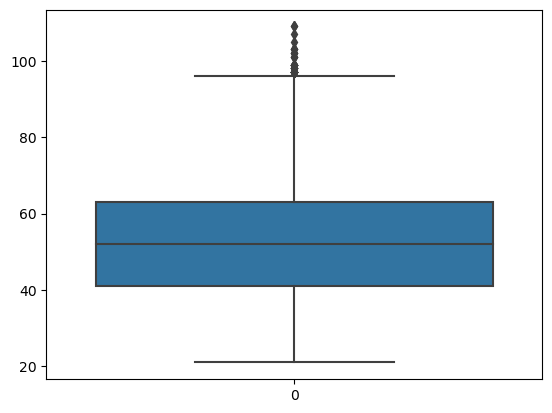

In [53]:
sns.boxplot(df['age'])
# we can delet the outliers from this

In [54]:
df.groupby(['NumberOfTime30-59DaysPastDueNotWorse']).size()
# after 13, number of delays (for 2 months) has jumped to 96 and 98 times 

NumberOfTime30-59DaysPastDueNotWorse
0     125239
1      16019
2       4588
3       1750
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       220
dtype: int64

In [55]:
# it isnot possible that there might be customers who delayed the loan payment 96&98 times
df.groupby(df['NumberOfTimes90DaysLate']).size()

NumberOfTimes90DaysLate
0     140874
1       5227
2       1554
3        666
4        291
5        131
6         80
7         38
8         20
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       220
dtype: int64

In [56]:
df.groupby(df['NumberOfTime60-89DaysPastDueNotWorse']).size()

NumberOfTime60-89DaysPastDueNotWorse
0     141600
1       5723
2       1117
3        318
4        104
5         34
6         16
7          8
8          2
9          1
11         1
96         5
98       220
dtype: int64

In [57]:
df['NumberOfTime60-89DaysPastDueNotWorse'].quantile(.99)
# 99% of data is <=2, not even reaching 96&98

2.0

<Axes: >

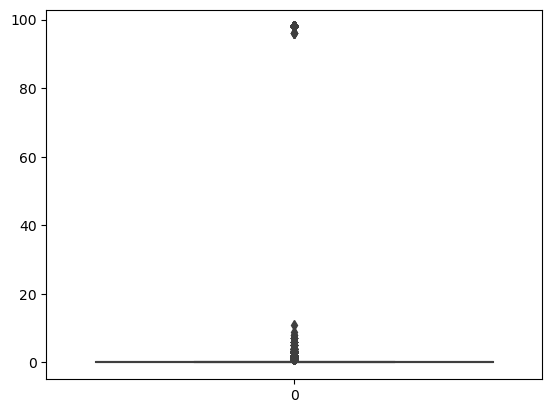

In [58]:
sns.boxplot(df['NumberOfTime60-89DaysPastDueNotWorse'])

In [59]:
# As we can see, number of delays =96, 98 exist in three columns.
# Thus, we can drop them from df. But let's first see what are their effects on the default columns "SeriousDlqin2yrs"

In [60]:
df[df['NumberOfTime30-59DaysPastDueNotWorse']>=17]['SeriousDlqin2yrs'].describe()

count    225.000000
mean       0.604444
std        0.490060
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: SeriousDlqin2yrs, dtype: float64

In [61]:
df[df['NumberOfTime30-59DaysPastDueNotWorse']>17].groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0     89
1    136
dtype: int64

In [62]:
df[df['NumberOfTime60-89DaysPastDueNotWorse']>17].groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0     89
1    136
dtype: int64

In [63]:
df[df['NumberOfTimes90DaysLate']>17].groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0     89
1    136
dtype: int64

In [64]:
# As we can see huge amount of data of 97 and 98 number of delays belong to the defaulters in all 3 above mentioned columns.
# Thus, we can't delet them. We can figure out to treat them

### Winsorizing
- There are several ways to treat outliers in data, and "winsorizing" is just one of them. 
- Winsorizing the data involves replacing the income outliers with the nearest non-outlier values. 
- This ensures that the extreme values are still accounted for in the analysis, but their impact is minimized.

<Axes: >

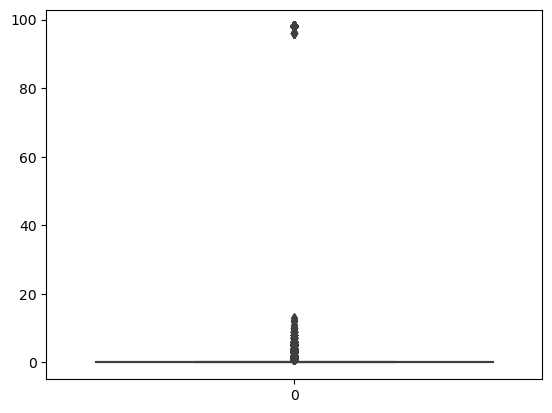

In [65]:
sns.boxplot(df['NumberOfTime30-59DaysPastDueNotWorse'])

In [66]:
from scipy.stats import mstats
#from scipy.stats.mstats import winsorize
df['NumberOfTime30-59DaysPastDueNotWorse'] = mstats.winsorize(df['NumberOfTime30-59DaysPastDueNotWorse'], limits =[0.001, 0.001])
df['NumberOfTimes90DaysLate'] = mstats.winsorize(df['NumberOfTimes90DaysLate'], limits =[0.001, 0.001])
df['NumberOfTime60-89DaysPastDueNotWorse'] = mstats.winsorize(df['NumberOfTime60-89DaysPastDueNotWorse'], limits =[0.001, 0.001]) 
#df['age'] = mstats.winsorize(df['age'], limits =[0.01, 0.01])

<Axes: >

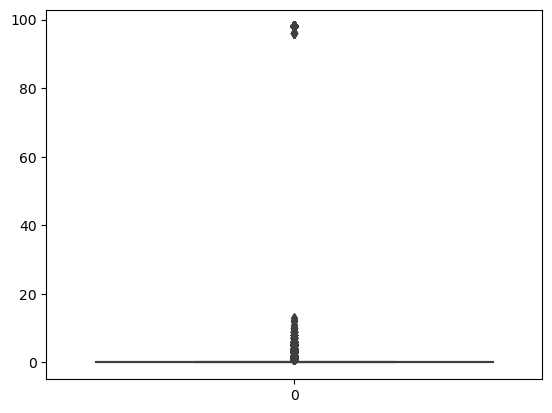

In [67]:
sns.boxplot(df['NumberOfTime30-59DaysPastDueNotWorse'])

In [68]:
df['DebtRatio'].quantile([0.98])

0.98    3841.0
Name: DebtRatio, dtype: float64

In [69]:
df[df['DebtRatio']>3841].groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0    2781
1     200
dtype: int64

In [70]:
df[df['DebtRatio']>3841].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000
mean,0.067092,0.353410,53.934586,0.321369,6490.489769,4813.086548,11.896679,0.049648,2.439785,0.051996,0.540758
std,0.250223,0.351091,10.468749,0.826192,12184.177323,1681.009593,5.476312,0.344005,1.589863,0.284346,1.019655
min,0.000000,0.000000,25.000000,0.000000,3842.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.052294,46.000000,0.000000,4299.000000,5400.000000,8.000000,0.000000,2.000000,0.000000,0.000000
50%,0.000000,0.246044,54.000000,0.000000,4985.000000,5400.000000,11.000000,0.000000,2.000000,0.000000,0.000000
75%,0.000000,0.596413,62.000000,0.000000,6191.000000,5400.000000,15.000000,0.000000,3.000000,0.000000,1.000000
max,1.000000,6.425716,94.000000,10.000000,329664.000000,5400.000000,43.000000,7.000000,23.000000,4.000000,6.000000


In [71]:
df[df['DebtRatio']>3841][['SeriousDlqin2yrs','MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,2981.000000,2981.000000
mean,0.067092,4813.086548
std,0.250223,1681.009593
min,0.000000,0.000000
25%,0.000000,5400.000000
50%,0.000000,5400.000000
75%,0.000000,5400.000000
max,1.000000,5400.000000


In [72]:
df[(df['DebtRatio']>3841) & (df['SeriousDlqin2yrs']==df['MonthlyIncome'])].describe()
# There are 298 records out of which MonthlyIncome and SeriousDlqin2yrs are eaual and DebtRatio >3841

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,0.006711,0.321988,52.879195,0.234899,7293.538591,0.006711,10.268456,0.026846,2.177852,0.043624,0.573826
std,0.081785,0.476444,11.130335,0.644994,14593.793251,0.081785,5.002533,0.181513,1.453631,0.235222,1.108394
min,0.000000,0.000000,26.000000,0.000000,3852.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.027949,45.250000,0.000000,4348.750000,0.000000,7.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.184938,51.500000,0.000000,4978.000000,0.000000,9.000000,0.000000,2.000000,0.000000,0.000000
75%,0.000000,0.508673,61.000000,0.000000,6091.000000,0.000000,13.000000,0.000000,3.000000,0.000000,0.000000
max,1.000000,6.425716,84.000000,4.000000,220516.000000,1.000000,26.000000,2.000000,15.000000,2.000000,5.000000


In [73]:
temp = df[(df['DebtRatio']>3841) & (df['SeriousDlqin2yrs']==df['MonthlyIncome'])]
temp

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
90,0,0.039388,51,0,15466.0,0.0,7,0,0,0,0.0
326,0,0.013115,43,0,4211.0,0.0,21,0,2,0,2.0
508,0,1.000000,73,0,8500.0,0.0,2,0,0,0,0.0
844,0,0.734284,45,0,11311.0,0.0,6,0,2,1,0.0
3370,0,1.000000,45,0,9260.0,0.0,7,0,4,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
146980,0,0.014529,68,0,6106.0,0.0,11,0,3,0,0.0
147201,0,0.559414,62,1,4456.0,0.0,18,0,3,0,0.0
148050,0,0.785121,37,0,4376.0,0.0,12,0,1,0,0.0
148548,0,0.147604,48,0,4210.0,0.0,16,0,3,0,0.0


In [74]:
temp.groupby(['SeriousDlqin2yrs']).size()# mostly they are non-defaulter. so we can remove them.

SeriousDlqin2yrs
0    296
1      2
dtype: int64

In [75]:
df_dratio = df.drop(df[(df['DebtRatio']>3841) & (df['SeriousDlqin2yrs']==df['MonthlyIncome'])].index)

In [76]:
df.shape, temp.shape, df_dratio.shape

((149149, 11), (298, 11), (148851, 11))

<Axes: >

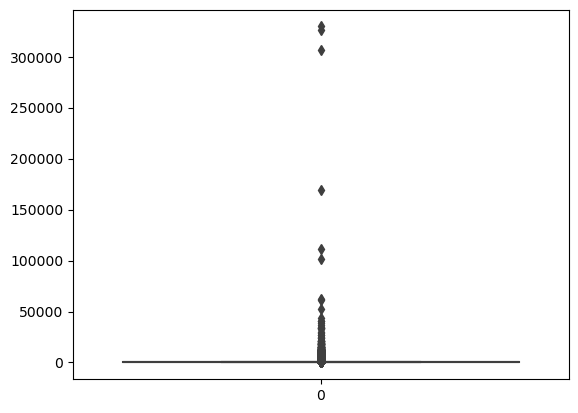

In [77]:
sns.boxplot(df_dratio['DebtRatio'])

In [78]:
df_dratio.groupby('SeriousDlqin2yrs').size()/df_dratio.shape[0]
# We have highly imbalanced data, 93% are non-defaulters and only 6.7% are defaulters

SeriousDlqin2yrs
0    0.932886
1    0.067114
dtype: float64

# XGBOOST Predicting Model

In [80]:
model = XGBClassifier(tree_method = 'exact')

In [81]:
x = df_dratio.drop(['SeriousDlqin2yrs'], axis=1)
y = df_dratio['SeriousDlqin2yrs']

In [82]:
model.fit(x,y.values.ravel())
y_pred = model.predict(x)

In [83]:
accuracy_score(y,y_pred)
# Accuracy is ~95%

0.9464162148725908

In [84]:
cm = confusion_matrix(y, y_pred)

In [85]:
cm

array([[138025,    836],
       [  7140,   2850]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual')

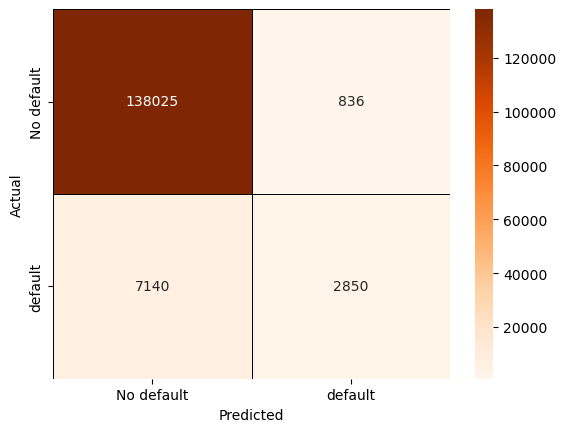

In [86]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', linewidth=0.5, linecolor='Black')
plt.xticks(np.arange(2)+.5, ['No default', 'default'])
plt.yticks(np.arange(2)+.5, ['No default', 'default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [87]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    138861
           1       0.77      0.29      0.42      9990

    accuracy                           0.95    148851
   macro avg       0.86      0.64      0.69    148851
weighted avg       0.94      0.95      0.93    148851



# Dealing with Imbalanced Data
### Problem with imbalanced data:
Usually, the minority class tends to be more important. The model's efficacy depends on being able to predict the minority class correctly. Machine learning models are also designed to be working on balanced data. Thus, they are unable to distinguish the minority class. Models tend to predict the dominant class. The accuracy of imbalanced data will  be misleading. 

There are 3 ways to deal with imbalanced data. 
- Data-level: Resampling data
- Model-level methods
- Metrics-level methods (Evaluation metrics)


## Re-Sampling
- Over-sampling: Duplicating samples from the minority class
- Under-sampling: Deleting samples from the minority class

Both of these methods, we creat a transformed version of data in which there is a new class distributin to decrease the impact of imbalanced data in our modeling and results of prediction. 

In [88]:
df_dratio.groupby('SeriousDlqin2yrs').size()/df_dratio.shape[0]
# We have highly imbalanced data

SeriousDlqin2yrs
0    0.932886
1    0.067114
dtype: float64

In [89]:
class_count_0, class_count_1 = df_dratio['SeriousDlqin2yrs'].value_counts()
class_count_0, class_count_1

(138861, 9990)

In [90]:
class_0 = df_dratio[df_dratio['SeriousDlqin2yrs'] == 0]
class_1 = df_dratio[df_dratio['SeriousDlqin2yrs'] == 1]# print the shape of the class
print('SeriousDlqin2yrs 0:', class_0.shape)
print('SeriousDlqin2yrs 1:', class_1.shape)

SeriousDlqin2yrs 0: (138861, 11)
SeriousDlqin2yrs 1: (9990, 11)


In [91]:
class_0_under = class_0.sample(class_count_1)

In [92]:
test_under = pd.concat([class_0_under, class_1], axis=0)

In [93]:
test_under

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
45191,0,0.092552,44,0,1806.000000,5400.0,8,0,2,0,0.0
38593,0,0.929923,56,2,0.325562,7377.0,7,0,2,0,0.0
27965,0,0.770039,63,1,0.586128,8318.0,15,0,2,0,1.0
77753,0,0.036748,49,0,26.000000,5400.0,2,0,0,0,0.0
6752,0,0.465049,36,0,0.297676,4000.0,4,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
144996,1,0.895956,42,1,2356.000000,0.0,9,0,0,0,0.0
147258,1,1.000000,25,98,0.000000,0.0,0,98,0,98,0.0
148971,1,1.000000,42,0,0.000000,0.0,0,1,0,0,0.0
149420,1,1.000000,33,0,71.000000,0.0,1,2,0,1,0.0


In [94]:
test_under.groupby('SeriousDlqin2yrs').size()/test_under.shape[0] 
#Now we have same percentage of 0 and 1 data in "SeriousDlqin2yrs" column

SeriousDlqin2yrs
0    0.5
1    0.5
dtype: float64

# XGBoost Prediction Over Balanced Data

In [95]:
model = XGBClassifier(tree_method = 'exact')
x = test_under.drop(['SeriousDlqin2yrs'], axis=1)
y = test_under['SeriousDlqin2yrs']
model.fit(x,y.values.ravel())
y_pred = model.predict(x)
cm_undersampling = confusion_matrix(y, y_pred)
print(accuracy_score(y,y_pred))
print(cm_undersampling)
print(classification_report(y,y_pred))

0.8575075075075075
[[8683 1307]
 [1540 8450]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      9990
           1       0.87      0.85      0.86      9990

    accuracy                           0.86     19980
   macro avg       0.86      0.86      0.86     19980
weighted avg       0.86      0.86      0.86     19980



Text(50.722222222222214, 0.5, 'Actual')

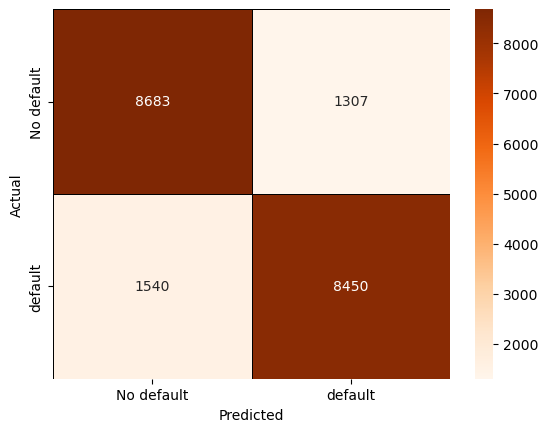

In [96]:
sns.heatmap(cm_undersampling, annot=True, fmt='d', cmap='Oranges', linewidth=0.5, linecolor='Black')
plt.xticks(np.arange(2)+.5, ['No default', 'default'])
plt.yticks(np.arange(2)+.5, ['No default', 'default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Results:
- After resampling in oredr to acquire balanced data using undersampling, we obtained the accuracy of 86% which was 10% less than that of initial data. However, it is obtained out of balanced data. 